# Analysis of Computer Science - Artificial Intelligence Journals, Conferences and Books from 2010 to 2020

Data Source: [SCImago Journal & Country Rank](https://www.scimagojr.com/) and [Scopus](https://www.scopus.com/)

## Loading Data

In [51]:
import pandas as pd

df_2020 = pd.read_csv("data/scimagojr 2020  Subject Category - Artificial Intelligence.csv",
                      sep = ";",
                      thousands=',',
                      header = 0)
df_2020.head()

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Quartile,H index,Total Docs. (2020),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories
0,1,21100886132,Science Robotics,journal,24709476,5619.0,Q1,50,83,217,3048,3969,198,1849,3672,United States,Northern America,American Association for the Advancement of Sc...,2016-2020,Artificial Intelligence (Q1); Computer Science...
1,2,21101007236,Nature Machine Intelligence,journal,25225839,4894.0,Q1,16,65,57,2720,949,25,1665,4185,Switzerland,Western Europe,Springer Nature Switzerland AG,2019-2020,Artificial Intelligence (Q1); Computer Network...
2,3,19300156903,Foundations and Trends in Machine Learning,journal,"19358245, 19358237",4292.0,Q1,35,4,12,528,814,12,6956,13200,United States,Northern America,Now Publishers Inc,2008-2019,Artificial Intelligence (Q1); Human-Computer I...
3,4,24254,IEEE Transactions on Pattern Analysis and Mach...,journal,01628828,3811.0,Q1,372,312,643,12574,21311,621,2554,4030,United States,Northern America,IEEE Computer Society,1978-2020,Applied Mathematics (Q1); Artificial Intellige...
4,5,21100842169,AISec 2017 - Proceedings of the 10th ACM Works...,conference and proceedings,-,2953.0,-,9,0,16,0,745,14,0,0,United States,Northern America,NaN,2017,Artificial Intelligence


In [52]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1456 non-null   int64  
 1   Sourceid                1456 non-null   int64  
 2   Title                   1456 non-null   object 
 3   Type                    1456 non-null   object 
 4   Issn                    1456 non-null   object 
 5   SJR                     1452 non-null   float64
 6   SJR Quartile            1456 non-null   object 
 7   H index                 1456 non-null   int64  
 8   Total Docs. (2020)      1456 non-null   int64  
 9   Total Docs. (3years)    1456 non-null   int64  
 10  Total Refs.             1456 non-null   int64  
 11  Total Cites (3years)    1456 non-null   int64  
 12  Citable Docs. (3years)  1456 non-null   int64  
 13  Cites / Doc. (2years)   1456 non-null   int64  
 14  Ref. / Doc.             1456 non-null   

## Type of publication frequency


<AxesSubplot:title={'center':'2020'}>

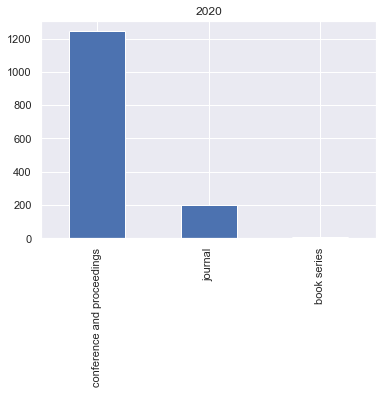

In [53]:
import seaborn as sns

sns.set_theme()

df_2020["Type"].value_counts().plot(kind="bar", title="2020")

## Country frequency

<AxesSubplot:title={'center':'Country in 2020 - Log scale'}>

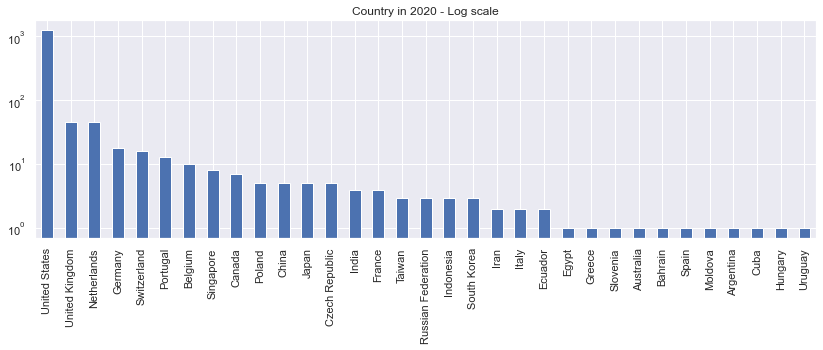

In [54]:
df_2020["Country"].value_counts().plot(kind="bar", title = "Country in 2020 - Log scale", figsize=(14,4), logy = True)

## Correlation between SJR and H-Index

Text(0.5, 1.0, 'Correlation SJR - H Index')

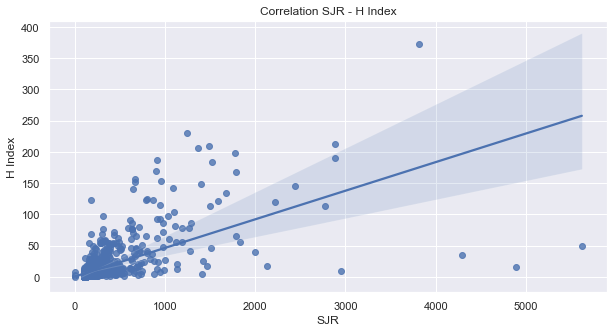

In [65]:
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

x = df_2020["SJR"].fillna(0).values
y = df_2020["H index"].fillna(0).values

plt.figure(figsize=(10,5))
sns.regplot(x = x, y = y)
plt.xlabel("SJR")
plt.ylabel("H Index")
plt.title("Correlation SJR - H Index")



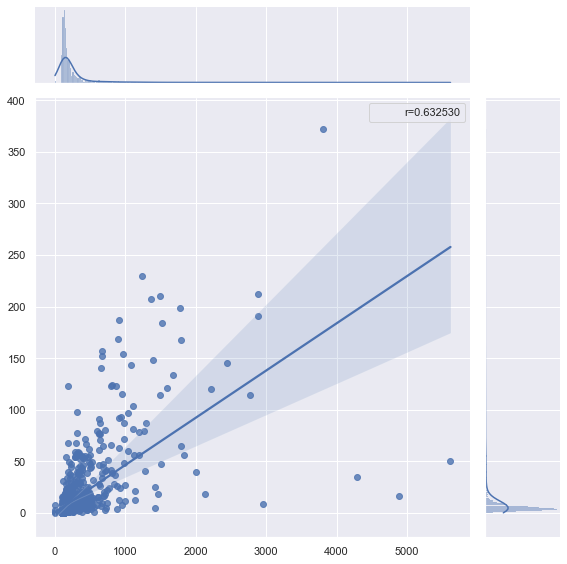

In [83]:
from scipy import stats

r, p = stats.pearsonr(x, y)

graph = sns.jointplot(x = x, y = y, kind="reg", height = 8)

# adjust the properties
phantom, = graph.ax_joint.plot([], [], linestyle="")

# the graph is not an ax but a joint grid, so we access the axis through ax_joint method
graph.ax_joint.legend([phantom],['r={:f}'.format(r)])
